## Mesures temporelles - durée de parcours d'une onde ultrasonore

Lorsque l'utilisateur clique sur le bouton `Mesure` le programme :
 - envoie la commande `mesure` à la carte _Arduino_,
 - reçoit des données sur la liaison série et les affiche sous forme de graphe $E=f(t)$.

In [2]:
liste_ports()

['COM3']

In [3]:
import sys
sys.path.insert(0, "..")

from pduino import *
from juduino import *

# modifiez le port en fonction de votre configuration
mon_interface = Interface('COM3', [('t', 'ms'), ('E', '')], 'temporel', False)

def mesure():
    # exécuté lorsque l'utilisateur clique sur le bouton 'Mesure'
    global t, E
    t, E = mon_interface.mesures_tempo('mesure', 1)
    
def sauvegarde():
    # exécuté lorsque l'utilisateur clique sur le bouton 'Sauvegarde'
    fichier = saisie.value + '.csv'
    ecrit_fichier_csv(fichier, t, E)
    print('fichier {} créé'.format(fichier))
    
# --- programme principal
mon_interface.add_bouton('Mesure', mesure)
saisie = mon_interface.add_saisie('Nom Fichier', 'mesures_us')
mon_interface.add_bouton('Sauvegarde', sauvegarde)
mon_interface.affiche()

In [6]:
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from pduino import lit_fichier
import numpy as np

def recherche_front_montant(t, E):
    for i in range(len(E)-1):
        if (int(E[i+1]) == 1 ) and (int(E[i]) == 0 ):
            m_t = (t[i] + t[i+1]) / 2
            return m_t
    return None

def recherche_front_descendant(t, E):
    for i in range(len(E)-1):
        if (int(E[i+1]) == 0 ) and (int(E[i]) == 1 ):
            m_t = (t[i] + t[i+1]) / 2
            return m_t
    return None

## Lecture du fichier de mesures et affichage du graphique $E = f(t)$

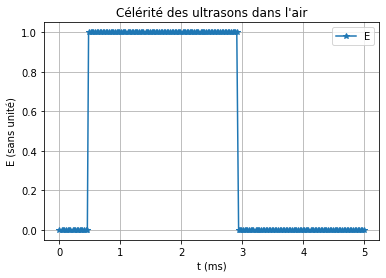

In [8]:
# Lit le fichier de mesures
t, E = np.array(lit_fichier('mesures_us.csv'))

fig_c = plt.figure("Célérité des ultrasons", figsize=(6, 4))
plt.title("Célérité des ultrasons dans l'air")
plt.plot(t*1000, E, marker = '*', label = 'E')
plt.grid()
plt.xlabel('t (ms)')
plt.ylabel ('E (sans unité)')
plt.legend()
plt.show()

## Détermination de la célérité du son

In [6]:
# --- calcul de la célérité du son ---
d = 40e-2
t1 = recherche_front_montant(t, E)
t2 = recherche_front_descendant(t, E)
dt =  t2 - t1
v = 2 * d / dt
print('V = {} m.s-1'.format(round(v, 1)))

V = 350.9 m.s-1
